Gentec pixel size updated to: 5.5 um from file header.
Gentec pixel size updated to: 5.5 um from file header.


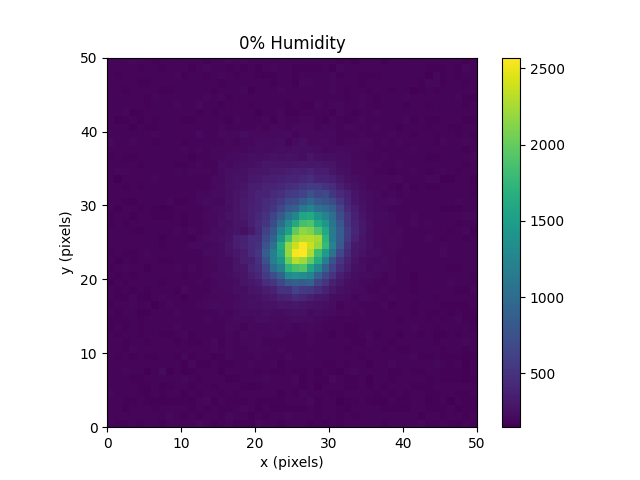

In [5]:
from BeamAnalysis import BeamAnalysis
%matplotlib widget

dir_path_GENTEC_PP = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250524/gentec CCD/Open_vs_closed_box'
filename = '46 degrees hum 0 camera horizontal.txt'
x_center_GENTEC_PP = 128-1
y_center_GENTEC_PP = 131 + 2
width = 50
crop_x_range_GENTEC_PP = (x_center_GENTEC_PP - width / 2, x_center_GENTEC_PP + width / 2)
crop_y_range_GENTEC_PP = (y_center_GENTEC_PP - width / 2, y_center_GENTEC_PP + width / 2)

beam_analysis_GENTEC_PP = BeamAnalysis(dir_path=dir_path_GENTEC_PP,
                                               signal_filename=filename,
                                               camera_name='gentec',
                                               crop_range_x_pixels=crop_x_range_GENTEC_PP,
                                               crop_range_y_pixels=crop_y_range_GENTEC_PP)
fig_GENTEC_PP, ax_GENTEC_PP = beam_analysis_GENTEC_PP.plot_map_in_pixels()
ax_GENTEC_PP.set_title('0% Humidity')
fig_GENTEC_PP.savefig('0_percent_humidity.pdf')

Gentec pixel size updated to: 5.5 um from file header.
Gentec pixel size updated to: 5.5 um from file header.


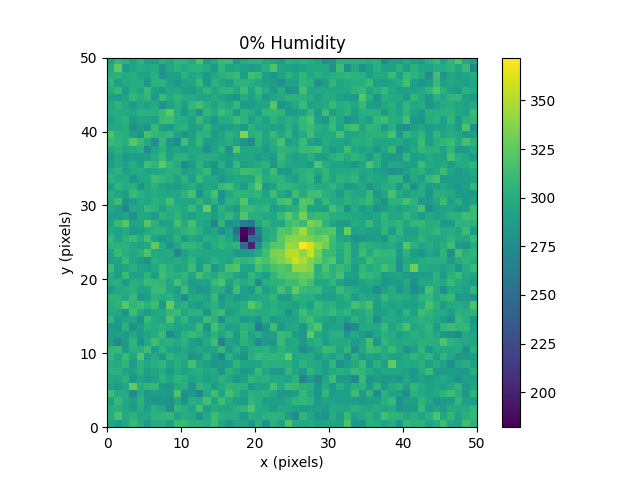

In [7]:
from BeamAnalysis import BeamAnalysis
%matplotlib widget

dir_path_GENTEC_PP = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250524/gentec CCD/Open_vs_closed_box'
filename = '46 degrees hum 35 camera horizontal_2.txt'
x_center_GENTEC_PP = 128-1
y_center_GENTEC_PP = 131 + 2
width = 50
crop_x_range_GENTEC_PP = (x_center_GENTEC_PP - width / 2, x_center_GENTEC_PP + width / 2)
crop_y_range_GENTEC_PP = (y_center_GENTEC_PP - width / 2, y_center_GENTEC_PP + width / 2)

beam_analysis_GENTEC_PP = BeamAnalysis(dir_path=dir_path_GENTEC_PP,
                                               signal_filename=filename,
                                               camera_name='gentec',
                                               crop_range_x_pixels=crop_x_range_GENTEC_PP,
                                               crop_range_y_pixels=crop_y_range_GENTEC_PP)
fig_GENTEC_PP, ax_GENTEC_PP = beam_analysis_GENTEC_PP.plot_map_in_pixels()
ax_GENTEC_PP.set_title('0% Humidity')
fig_GENTEC_PP.savefig('35_percent_humidity.pdf')

Gentec pixel size updated to: 5.5 um from file header.
Gentec pixel size updated to: 5.5 um from file header.
Gentec pixel size updated to: 5.5 um from file header.
Gentec pixel size updated to: 5.5 um from file header.
Global color scale: vmin=146.0, vmax=2571.0


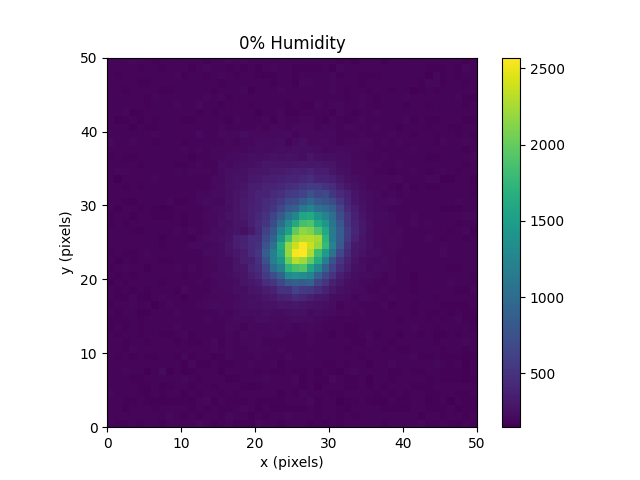

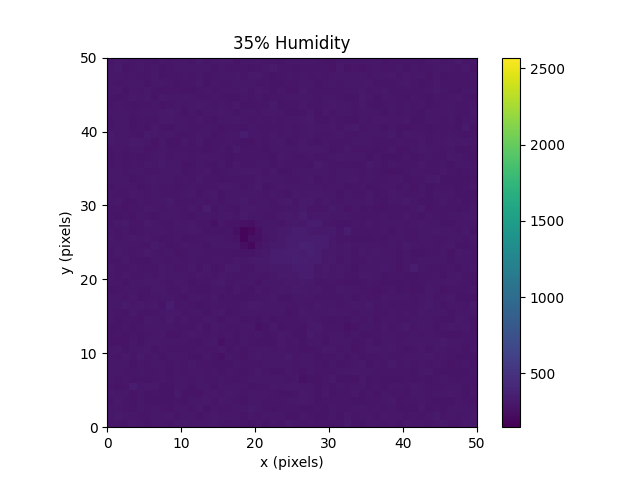

In [10]:
from BeamAnalysis import BeamAnalysis
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

# Common parameters
dir_path_GENTEC_PP = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250524/gentec CCD/Open_vs_closed_box'
camera_name = 'gentec'
x_center_GENTEC_PP = 128 - 1
y_center_GENTEC_PP = 131 + 2
width = 50  # Define width once

# Ensure crop ranges are integers if they are used as slice indices
crop_x_min = int(x_center_GENTEC_PP - width / 2)
crop_x_max = int(x_center_GENTEC_PP + width / 2)
crop_y_min = int(y_center_GENTEC_PP - width / 2)
crop_y_max = int(y_center_GENTEC_PP + width / 2)

crop_x_range_GENTEC_PP = (crop_x_min, crop_x_max)
crop_y_range_GENTEC_PP = (crop_y_min, crop_y_max)

# File specific parameters
file_configs = [
    {'filename': '46 degrees hum 0 camera horizontal.txt', 'title': '0% Humidity',
     'savename': '0_percent_humidity.pdf'},
    {'filename': '46 degrees hum 35 camera horizontal_2.txt', 'title': '35% Humidity',
     'savename': '35_percent_humidity.pdf'}
]

beam_analyses_objects = []
map_data_for_scaling = []

for config in file_configs:
    ba = BeamAnalysis(dir_path=dir_path_GENTEC_PP,
                      signal_filename=config['filename'],
                      camera_name=camera_name,
                      crop_range_x_pixels=crop_x_range_GENTEC_PP,
                      crop_range_y_pixels=crop_y_range_GENTEC_PP)
    beam_analyses_objects.append(ba)
    # Access map data using ba.map_array
    if hasattr(ba,
               'map_array') and ba.map_array is not None:
        map_data_for_scaling.append(ba.map_array)
    else:
        print(f"Warning: Could not access 'map_array' from BeamAnalysis for {config['filename']}")

global_vmin, global_vmax = None, None
if map_data_for_scaling:
    valid_data = [data[np.isfinite(data)] for data in map_data_for_scaling if data is not None and data.size > 0]
    if valid_data:
        all_pixel_values = np.concatenate([data.ravel() for data in valid_data])
        if all_pixel_values.size > 0:
            global_vmin = np.min(all_pixel_values)
            global_vmax = np.max(all_pixel_values)

print(f"Global color scale: vmin={global_vmin}, vmax={global_vmax}")

for i, ba_obj in enumerate(beam_analyses_objects):
    config = file_configs[i]

    fig, ax = ba_obj.plot_map_in_pixels()

    if global_vmin is not None and global_vmax is not None:
        if ax.images:
            image_object = ax.images[0]
            image_object.set_clim(vmin=global_vmin,
                                  vmax=global_vmax)

            # Update colorbar if it exists and is accessible
            # This part might need adjustment based on how your colorbars are created
            if hasattr(fig,
                       'colorbar') and fig.colorbar:
                # If using fig.colorbar(image_object, ax=ax) or similar,
                # re-creating or updating it might be necessary if set_clim doesn't auto-update it.
                # For now, assuming set_clim is sufficient or it auto-updates.
                pass
            elif fig.axes[-1].get_label() == '<colorbar>':  # A common heuristic for matplotlib colorbars
                cbar_ax = fig.axes[-1]
                # If the colorbar was created with the image, set_clim on image should update it.
                # If it's a standalone colorbar, you might need to update it directly.
                # For simplicity, we'll assume set_clim on the image handles it.
                pass
        else:
            print(f"Warning: No image found on axes for {config['filename']} to apply color scale.")

    ax.set_title(config['title'])
    fig.savefig(config['savename'])
    # plt.show()
